In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import itertools
import sklearn
from sklearn.metrics import log_loss

In [2]:
import loan_approval_lib
from loan_approval_lib import logspace, linspace

In [3]:
data = loan_approval_lib.load_original_data()

In [4]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [5]:
len(data)

32581

Load test dataset from competition (synthetic) dataset

In [6]:
data_test = loan_approval_lib.load_data()['test']

In [7]:
data_test

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4


In [8]:
data_loan_status_deny = data[data['loan_status'] == 1]
data_loan_status_approve = data[data['loan_status'] == 0]

# Plot Credit History

In [9]:
column = 'cb_person_cred_hist_length'

data_loan_status_deny[column].min(), data_loan_status_deny[column].max()

(np.int64(2), np.int64(30))

In [10]:
column = 'cb_person_cred_hist_length'

data_loan_status_approve[column].min(), data_loan_status_approve[column].max()

(np.int64(2), np.int64(30))

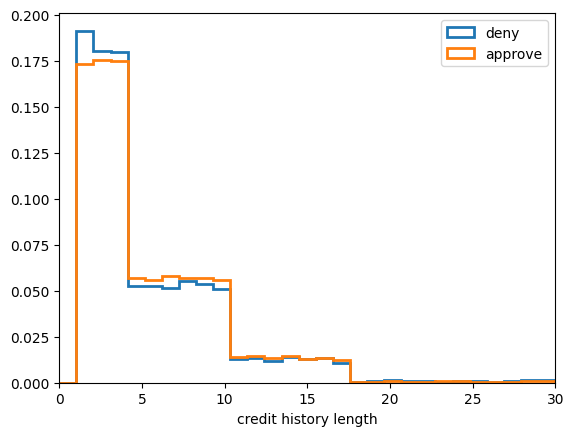

In [12]:
column = 'cb_person_cred_hist_length'

data_deny = data_loan_status_deny[column]
data_accept = data_loan_status_approve[column]

_ = plt.hist(
    data_deny,
    bins=numpy.linspace(0, 30, 30), #logspace(data_train_loan_status_deny[column]),
    histtype='step',
    density=True,
    label='deny',
    linewidth=2,
)
_ = plt.hist(
    data_accept,
    bins=numpy.linspace(0, 30, 30), #logspace(data_train_loan_status_accept[column]),
    histtype='step',
    density=True,
    label='approve',
    linewidth=2,
)
plt.xlim(left=0, right=30)
plt.xlabel('credit history length')
#plt.xscale('log')
plt.legend()
None
#plt.yscale('log')

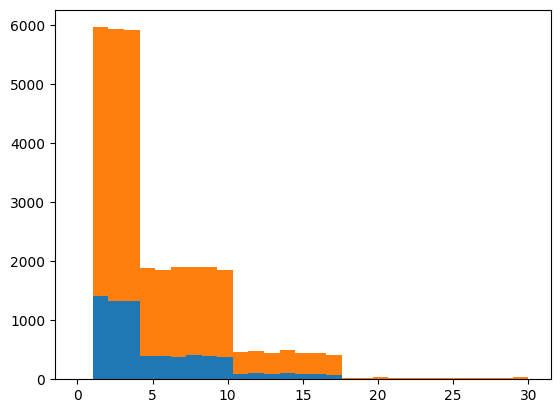

In [14]:
column = 'cb_person_cred_hist_length'

data_deny = data_loan_status_deny[column]
data_accept = data_loan_status_approve[column]

plt.figure()
plt.hist(
    [data_deny, data_accept],
    bins=numpy.linspace(0, 30, 30),
    stacked=True,
    label=['reject', 'approve'],
)
None

It does not look like a linear regression would have any discrimination power between loan approval and rejections when regressed against credit history length. This may be because early careers, presumably with short credit lengths, are more likely to have rejections, and late careers, presumably with long credit lengths, but perhaps short time to retirement, are also likely to have rejections compared with people in the middle of their careers, who have a longer time to retirement, but more experience, and a median credit history length.

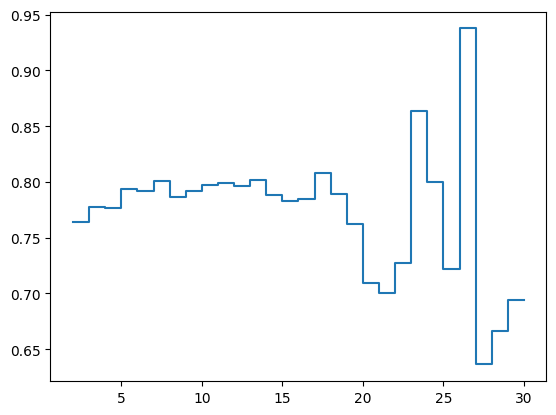

In [27]:
column = 'cb_person_cred_hist_length'

data_deny = data_loan_status_deny[column]
data_accept = data_loan_status_approve[column]

h_data_deny, bins_deny = numpy.histogram(data_deny, bins=numpy.ptp(data_deny))
h_data_accept, bins_accept = numpy.histogram(data_accept, bins=numpy.ptp(data_accept))
assert all(bins_deny == bins_accept)

h_data_ratio = h_data_accept / (h_data_deny + h_data_accept)

plt.figure()
plt.step(
    bins_deny,
    numpy.concatenate([[h_data_ratio[0]], h_data_ratio]),
    label='ratio',
)
None

# Plot person age

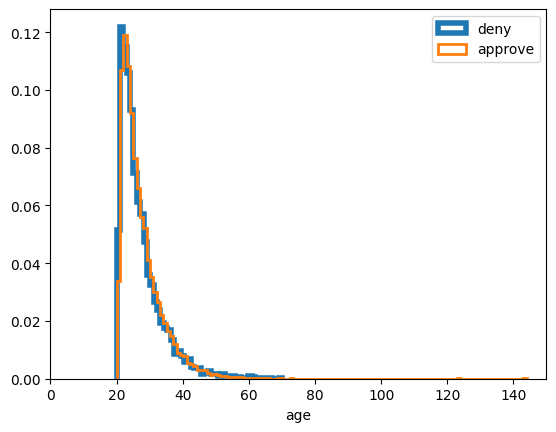

In [30]:
column = 'person_age'

data_deny = data_loan_status_deny[column]
data_accept = data_loan_status_approve[column]

_ = plt.hist(
    data_deny,
    bins=linspace(data_deny), 
    histtype='step',
    density=True,
    label='deny',
    linewidth=4,
)
_ = plt.hist(
    data_accept,
    bins=linspace(data_accept),
    histtype='step',
    density=True,
    label='approve',
    linewidth=2,
)
plt.xlabel('age')
plt.xlim(left=0, right=150)
#plt.xscale('log')
plt.legend()
None
#plt.yscale('log')

# Income

/home/edward/Jupyter/venv/lib/python3.12/site-packages/numpy/lib/_histograms_impl.py:901: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


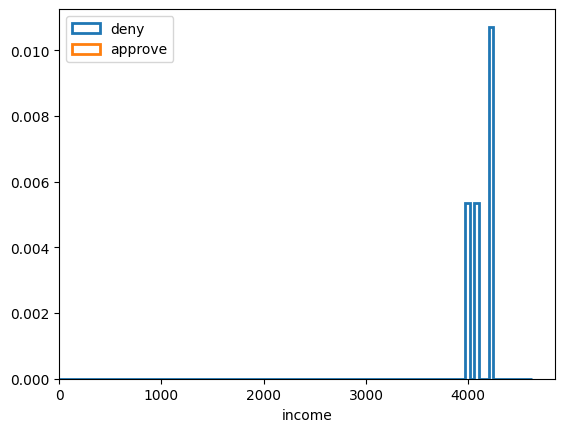

In [32]:
column = 'person_income'

data_deny = data_loan_status_deny[column]
data_accept = data_loan_status_approve[column]

max_ = max(h_data_accept.max(), h_data_deny.max())

plt.hist(
    data_deny,
    bins=numpy.linspace(0, max_, 100), #logspace(data_train_loan_status_deny[column]),
    histtype='step',
    density=True,
    label='deny',
    linewidth=2,
)
plt.hist(
    data_accept,
    bins=numpy.linspace(0, max_, 100), #logspace(data_train_loan_status_accept[column]),
    histtype='step',
    density=True,
    label='approve',
    linewidth=2,
)
plt.xlabel('income')
plt.xlim(left=0)
#plt.yscale('log')
plt.legend()
None
#plt.yscale('log')

Higher income has slightly higher loan approvals, so there may be some discrimination power here

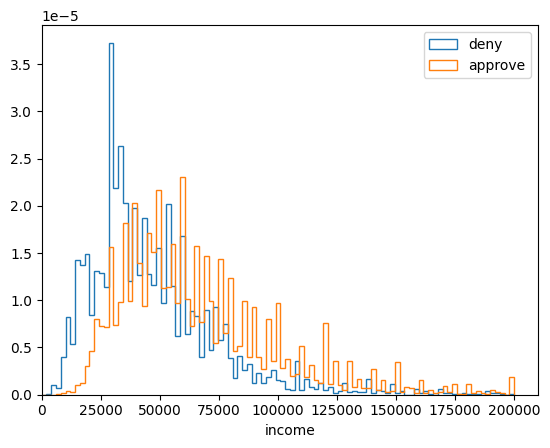

In [33]:
column = 'person_income'

h_data_deny = data_loan_status_deny[column]
h_data_accept = data_loan_status_approve[column]

max_ = 2.0e5

plt.hist(
    h_data_deny,
    bins=numpy.linspace(0, max_, 100), #logspace(data_train_loan_status_deny[column]),
    histtype='step',
    density=True,
    label='deny',
)
_plt.hist(
    h_data_accept,
    bins=numpy.linspace(0, max_, 100), #logspace(data_train_loan_status_accept[column]),
    histtype='step',
    density=True,
    label='approve',
)
plt.xlabel('income')
plt.xlim(left=0)
#plt.yscale('log')
plt.legend()
None

# Loan Percentage of Income

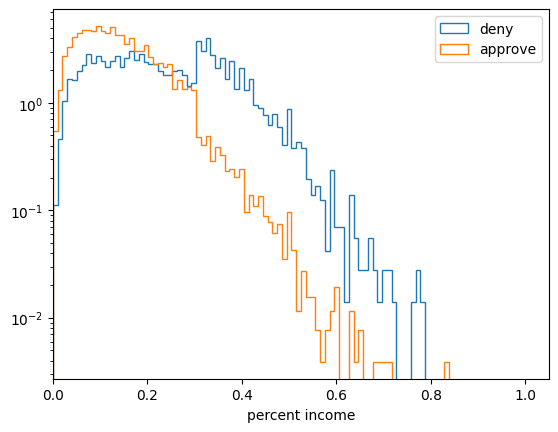

In [35]:
column = 'loan_percent_income'

data_deny = data_loan_status_deny[column]
data_approve = data_loan_status_approve[column]

max_ = 1.0 #max(h_data_accept.max(), h_data_deny.max())

plt.hist(
    data_deny,
    bins=numpy.linspace(0, max_, 100), #logspace(data_train_loan_status_deny[column]),
    histtype='step',
    density=True,
    label='deny',
)
plt.hist(
    data_approve,
    bins=numpy.linspace(0, max_, 100), #logspace(data_train_loan_status_accept[column]),
    histtype='step',
    density=True,
    label='approve',
)
plt.xlabel('percent income')
plt.xlim(left=0)
plt.yscale('log')
plt.legend()
None
#plt.yscale('log')

In [37]:
column = 'loan_percent_income'

data_deny = data_loan_status_deny[column]
data_approve = data_loan_status_approve[column]

hist_data_deny, bins_data_deny = numpy.histogram(
    data_deny,
    numpy.linspace(0, 1, 100),
    density=True,
)

hist_data_approve, bins = numpy.histogram(
    data_approve,
    numpy.linspace(0, 1, 100),
    density=True,
)   

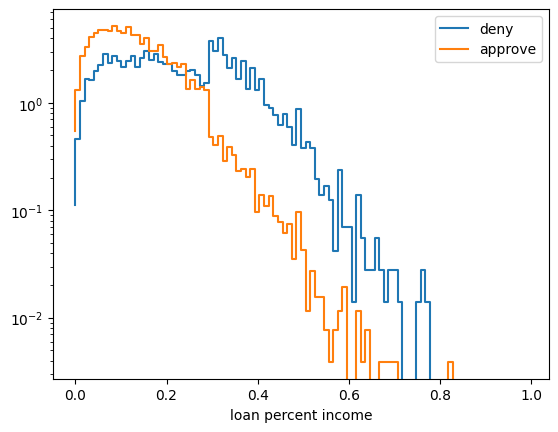

In [38]:
plt.step(
    bins[:-1],
    hist_data_deny,
    label='deny',
)
plt.step(
    bins[:-1],
    hist_data_approve,
    label='approve',
)
plt.yscale('log')
plt.xlabel('loan percent income')
plt.legend()
None

In [39]:
hist_data_model = hist_data_approve / (hist_data_approve + hist_data_deny)

/tmp/ipykernel_2960/1893349480.py:1: RuntimeWarning: invalid value encountered in divide
  hist_data_model = hist_data_approve / (hist_data_approve + hist_data_deny)


In [40]:
hist_data_model = numpy.nan_to_num(hist_data_model)

In [41]:
hist_data_model

array([0.83002476, 0.74023248, 0.72398421, 0.66560656, 0.71674956,
       0.69268028, 0.67818293, 0.625113  , 0.6664292 , 0.65558277,
       0.6549471 , 0.67360931, 0.67433157, 0.60843357, 0.6646645 ,
       0.57346402, 0.56991543, 0.54860948, 0.51271499, 0.59157503,
       0.53670267, 0.49969006, 0.54066905, 0.54409408, 0.55771933,
       0.40713225, 0.44928039, 0.42359052, 0.49581902, 0.46681503,
       0.11315364, 0.11795867, 0.10856008, 0.09316081, 0.15294125,
       0.11085638, 0.12243773, 0.08903998, 0.13229503, 0.10366553,
       0.06908585, 0.07784435, 0.10305781, 0.13239655, 0.10449607,
       0.11033455, 0.07383899, 0.10976348, 0.07969712, 0.0996915 ,
       0.10207857, 0.02629389, 0.06746329, 0.07383899, 0.10040895,
       0.04444   , 0.03007213, 0.1568489 , 0.04693143, 0.21816396,
       0.        , 0.        , 0.07724576, 0.06521101, 0.21816396,
       0.        , 0.        , 0.12243773, 0.21816396, 0.12243773,
       0.12243773, 0.        , 0.        , 0.        , 0.     

In [42]:
window_size = 10
w = numpy.ones(window_size) / window_size
w

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [43]:
hist_data_model_pad = numpy.pad(hist_data_model, (window_size-1, 0), mode='edge')
hist_data_model_pad

array([0.83002476, 0.83002476, 0.83002476, 0.83002476, 0.83002476,
       0.83002476, 0.83002476, 0.83002476, 0.83002476, 0.83002476,
       0.74023248, 0.72398421, 0.66560656, 0.71674956, 0.69268028,
       0.67818293, 0.625113  , 0.6664292 , 0.65558277, 0.6549471 ,
       0.67360931, 0.67433157, 0.60843357, 0.6646645 , 0.57346402,
       0.56991543, 0.54860948, 0.51271499, 0.59157503, 0.53670267,
       0.49969006, 0.54066905, 0.54409408, 0.55771933, 0.40713225,
       0.44928039, 0.42359052, 0.49581902, 0.46681503, 0.11315364,
       0.11795867, 0.10856008, 0.09316081, 0.15294125, 0.11085638,
       0.12243773, 0.08903998, 0.13229503, 0.10366553, 0.06908585,
       0.07784435, 0.10305781, 0.13239655, 0.10449607, 0.11033455,
       0.07383899, 0.10976348, 0.07969712, 0.0996915 , 0.10207857,
       0.02629389, 0.06746329, 0.07383899, 0.10040895, 0.04444   ,
       0.03007213, 0.1568489 , 0.04693143, 0.21816396, 0.        ,
       0.        , 0.07724576, 0.06521101, 0.21816396, 0.     

In [44]:
len(hist_data_model_pad)

108

In [45]:
hist_data_model_pad[80:] = 0

In [46]:
hist_data_model_smooth = numpy.convolve(hist_data_model_pad, w, mode='valid')
hist_data_model_smooth = numpy.roll(hist_data_model_smooth, -(window_size-1)//2)
hist_data_model_smooth[80:] = 0
len(hist_data_model_smooth)

99

In [47]:
len(hist_data_model)

99

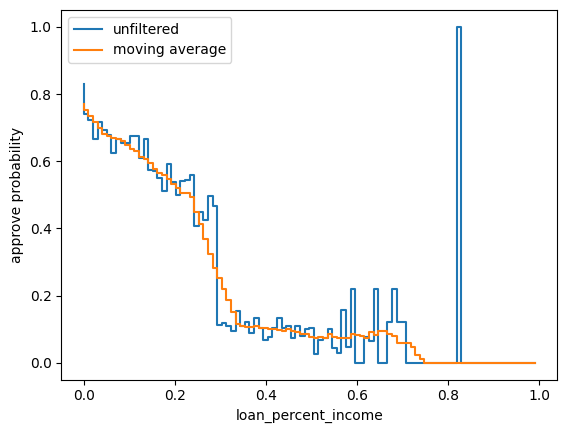

In [48]:
plt.step(
    bins[:-1],
    hist_data_model,
    label='unfiltered',
)
plt.step(
    bins[:-1],
    hist_data_model_smooth,
    label='moving average',
)
_ = plt.legend()
_ = plt.xlabel('loan_percent_income')
_ = plt.ylabel('approve probability')

This is the total number of events distribution

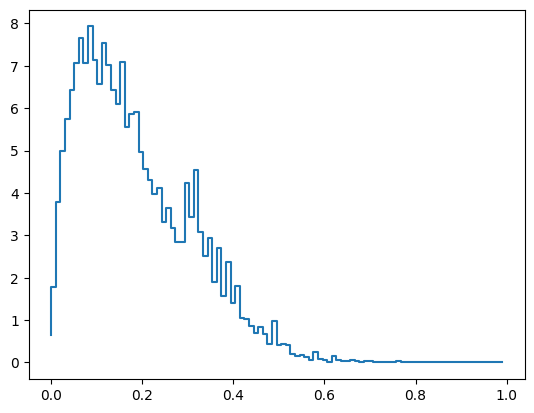

In [49]:
_ = plt.step(
    bins[:-1],
    hist_data_approve + hist_data_deny,
)

#### Use the smooth data to predict output

In [50]:
hist_data_model_smooth

array([0.76893769, 0.7537535 , 0.73326233, 0.71690277, 0.69945857,
       0.68195081, 0.67528849, 0.67032323, 0.66460593, 0.65939742,
       0.6474758 , 0.63664905, 0.6289987 , 0.61362727, 0.6072265 ,
       0.59540206, 0.57801013, 0.56464388, 0.55820993, 0.54751541,
       0.53088224, 0.51881873, 0.50631684, 0.50462724, 0.49215124,
       0.44979634, 0.4116232 , 0.3684123 , 0.32331897, 0.28284117,
       0.25321358, 0.22052931, 0.18707426, 0.15072186, 0.11440691,
       0.11000013, 0.1059887 , 0.10543847, 0.10936205, 0.10451753,
       0.10446535, 0.09960547, 0.10167782, 0.09641803, 0.09602063,
       0.0993199 , 0.09416485, 0.0906054 , 0.08474965, 0.08434093,
       0.07775148, 0.07337479, 0.07808333, 0.07480677, 0.08665401,
       0.07644616, 0.07381677, 0.07479501, 0.07393221, 0.08570772,
       0.08126372, 0.0782565 , 0.07481538, 0.09193864, 0.08236601,
       0.09460979, 0.09460979, 0.08688521, 0.08036411, 0.05854772,
       0.05854772, 0.05854772, 0.04630394, 0.02448755, 0.01224

In [51]:
data_test['loan_percent_income']

0        0.36
1        0.10
2        0.13
3        0.14
4        0.15
         ... 
39093    0.10
39094    0.15
39095    0.25
39096    0.39
39097    0.44
Name: loan_percent_income, Length: 39098, dtype: float64

In [52]:
import copy
data_test_predict = copy.copy(data_test[['id', 'loan_percent_income']])

In [53]:
data_test_predict['loan_status'] = numpy.interp(
    data_test_predict['loan_percent_income'].to_numpy(),
    bins[:-1],
    hist_data_model_smooth,
)

In [54]:
data_test_predict.sort_values('loan_percent_income')

,id,loan_percent_income,loan_status
39063,97708,0.00,0.768938
13981,72626,0.00,0.768938
34007,92652,0.00,0.768938
36960,95605,0.00,0.768938
24983,83628,0.01,0.753905
...,...,...,...
7541,66186,0.59,0.078760
32520,91165,0.60,0.083930
26342,84987,0.63,0.081151
30659,89304,0.63,0.081151


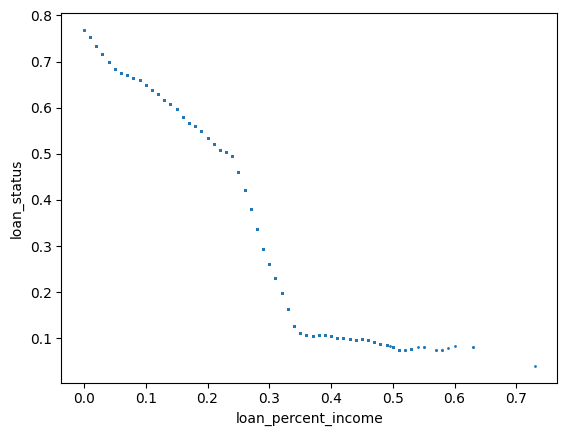

In [55]:
_ = plt.scatter(
    data_test_predict['loan_percent_income'],
    data_test_predict['loan_status'],
    s=1,
)
_ = plt.xlabel('loan_percent_income')
_ = plt.ylabel('loan_status')

Check that the model is producing sensible values. Show the histogram of inputs and scatter plot of outputs.

In [56]:
numpy.sort(data_test_predict['loan_percent_income'].unique())

array([0.   , 0.01 , 0.02 , 0.03 , 0.04 , 0.05 , 0.06 , 0.07 , 0.08 ,
       0.09 , 0.1  , 0.11 , 0.12 , 0.13 , 0.14 , 0.15 , 0.16 , 0.17 ,
       0.18 , 0.19 , 0.2  , 0.21 , 0.22 , 0.23 , 0.24 , 0.25 , 0.26 ,
       0.27 , 0.28 , 0.29 , 0.3  , 0.31 , 0.32 , 0.33 , 0.34 , 0.35 ,
       0.36 , 0.37 , 0.38 , 0.39 , 0.4  , 0.41 , 0.42 , 0.43 , 0.44 ,
       0.45 , 0.46 , 0.47 , 0.48 , 0.49 , 0.496, 0.5  , 0.51 , 0.52 ,
       0.53 , 0.54 , 0.55 , 0.57 , 0.58 , 0.59 , 0.6  , 0.63 , 0.73 ])

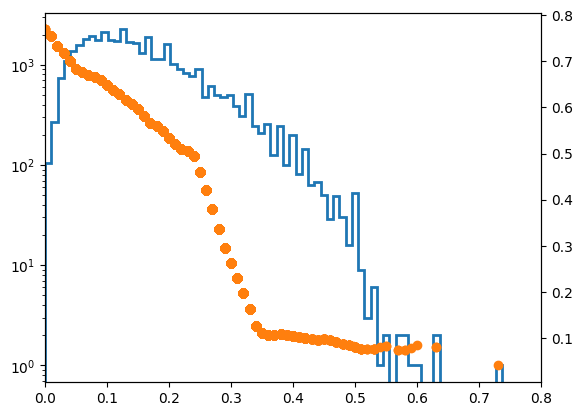

In [57]:
_ = plt.hist(
    data_test_predict['loan_percent_income'],
    bins=numpy.linspace(0,1,100),
    histtype='step',
    linewidth=2,
)
_ = plt.yscale('log')
_ = plt.twinx()
_ = plt.scatter(
    data_test_predict['loan_percent_income'],
    data_test_predict['loan_status'],
    color='tab:orange',
)
_ = plt.xlim(xmin=0, xmax=0.8)

When producing the output, need to predict the probability of loan reject

In [58]:
tmp = copy.copy(data_test_predict)
tmp['loan_status_inverse'] = 1.0 - tmp['loan_status']
tmp.rename(
    columns={
        'loan_status': 'loan_status_p_approve',
        'loan_status_inverse': 'loan_status',
    },
    inplace=True,
)

tmp[['id', 'loan_status']].to_csv('data_test_predict_original_1.csv', index=False)

tmp

,id,loan_percent_income,loan_status_p_approve,loan_status
0,58645,0.36,0.107433,0.892567
1,58646,0.10,0.648668,0.351332
2,58647,0.13,0.615626,0.384374
3,58648,0.14,0.608123,0.391877
4,58649,0.15,0.597176,0.402824
...,...,...,...,...
39093,97738,0.10,0.648668,0.351332
39094,97739,0.15,0.597176,0.402824
39095,97740,0.25,0.460385,0.539615
39096,97741,0.39,0.106407,0.893593


Test the interpolation function

In [59]:
numpy.interp(
    [0.1, 0.5, 0.9],
    bins[:-1],
    hist_data_model_smooth,
)

array([0.64866796, 0.08104621, 0.        ])

# Logistic Regression

In [230]:
x = data['loan_percent_income'].to_numpy().reshape(-1, 1)
y = data['loan_status'].to_numpy()

In [231]:
model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x, y)

In [232]:
clf.score(x, y)

0.8127743163193272

In [233]:
x1 = data_test['loan_percent_income'].to_numpy().reshape(-1, 1)
y1 = clf.predict_proba(x1)

y1.shape

(39098, 2)

In [260]:
clf.coef_, clf.intercept_

(array([[8.22079623]]), array([-2.85403675]))

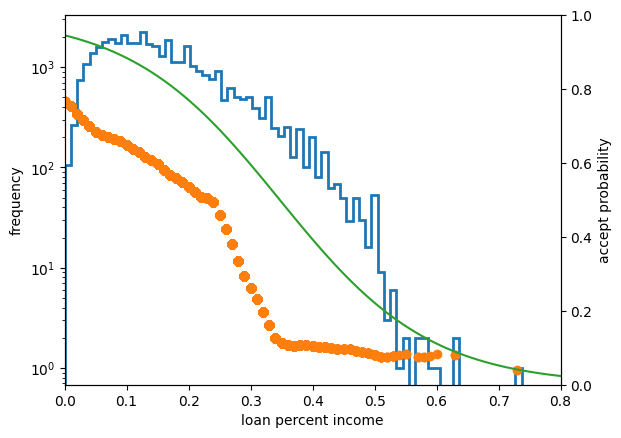

In [270]:
_ = plt.hist(
    data_test_predict['loan_percent_income'],
    bins=numpy.linspace(0,1,100),
    histtype='step',
    linewidth=2,
)
_ = plt.xlabel('loan percent income')
_ = plt.ylabel('frequency')
_ = plt.yscale('log')
_ = plt.twinx()
_ = plt.scatter(
    data_test_predict['loan_percent_income'],
    data_test_predict['loan_status'],
    color='tab:orange',
)
_ = plt.plot(
    numpy.linspace(0,1,100),
    1-clf.predict_proba(numpy.linspace(0,1,100).reshape(-1,1))[:,1],
    color='tab:green',
)
_ = plt.ylabel('accept probability')
_ = plt.xlim(xmin=0, xmax=0.8)
_ = plt.ylim(ymin=0, ymax=1)

In [235]:
data_test_predict_logistic = pandas.DataFrame(
    {
        'id': data_test['id'],
        'loan_status': y1[:, 1],
        'loan_percent_income': x1[:, 0],
    }
)
data_test_predict_logistic.sort_values('loan_percent_income')

,id,loan_status,loan_percent_income
39063,97708,0.054473,0.00
13981,72626,0.054473,0.00
34007,92652,0.054473,0.00
36960,95605,0.054473,0.00
24983,83628,0.058866,0.01
...,...,...,...
7541,66186,0.880401,0.59
32520,91165,0.888790,0.60
26342,84987,0.910932,0.63
30659,89304,0.910932,0.63


In [236]:
data_test_predict_logistic[['id', 'loan_status']].to_csv('data_test_predict_original_1-logistic.csv', index=False)

### Check the `loan_percent_income` column

- It is identical to the loan amount divided by income, in almost all cases. There are a few rows where the values differ. ~ 1000 / 32000

In [177]:
data[['person_income', 'loan_amnt', 'loan_percent_income']]

,person_income,loan_amnt,loan_percent_income
0,59000,35000,0.59
1,9600,1000,0.10
2,9600,5500,0.57
3,65500,35000,0.53
4,54400,35000,0.55
...,...,...,...
32576,53000,5800,0.11
32577,120000,17625,0.15
32578,76000,35000,0.46
32579,150000,15000,0.10


In [183]:
pandas.DataFrame(data['loan_amnt'] / data['person_income'])

,0
0,0.593220
1,0.104167
2,0.572917
3,0.534351
4,0.643382
...,...
32576,0.109434
32577,0.146875
32578,0.460526
32579,0.100000


In [193]:
tmp = pandas.concat(
    [
        data[['person_income', 'loan_amnt', 'loan_percent_income']],
        pandas.DataFrame(data['loan_amnt'] / data['person_income']).round(decimals=2),
    ],
    axis=1,
)
tmp['diff'] = tmp['loan_percent_income'] - tmp[0]
tmp[tmp['diff'] != 0]

,person_income,loan_amnt,loan_percent_income,0,diff
4,54400,35000,0.55,0.64,-0.09
17,92111,35000,0.32,0.38,-0.06
36,48000,30000,0.63,0.62,0.01
40,62050,30000,0.41,0.48,-0.07
48,66300,30000,0.38,0.45,-0.07
...,...,...,...,...,...
32480,62050,25000,0.34,0.40,-0.06
32485,24000,3000,0.13,0.12,0.01
32542,200000,3000,0.01,0.02,-0.01
32555,80000,18000,0.23,0.22,0.01


In [194]:
len(tmp[tmp['diff'] != 0])

1010

In [195]:
tmp['diff'].max()

np.float64(0.010000000000000009)

### Scatter Plot of `loan_percent_income` vs `loan_approval` for Train and Test Datasets

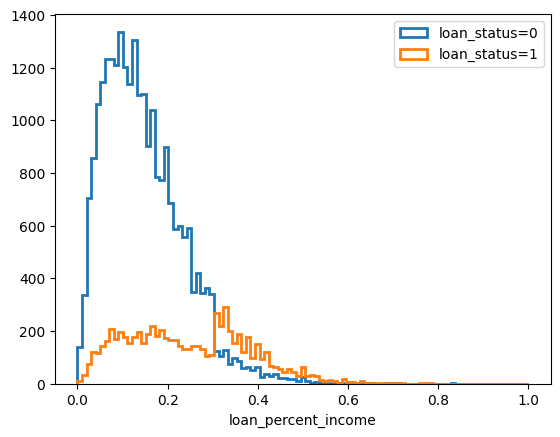

In [271]:
_ = plt.hist(
    data[data['loan_status'] == 0]['loan_percent_income'],
    histtype='step',
    bins=numpy.linspace(0, 1, 100),
    label='loan_status=0',
    linewidth=2,
)
_ = plt.hist(
    data[data['loan_status'] == 1]['loan_percent_income'],
    histtype='step',
    bins=numpy.linspace(0, 1, 100),
    label='loan_status=1',
    linewidth=2,
)
_ = plt.legend()
_ = plt.xlabel('loan_percent_income')

In [209]:
data_train = loan_approval_lib.load_data()['train']

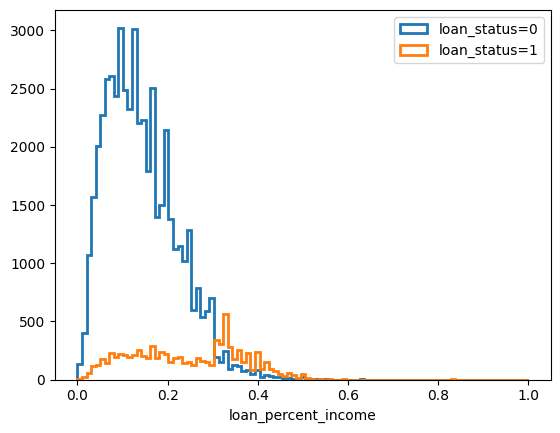

In [272]:
_ = plt.hist(
    data_train[data_train['loan_status'] == 0]['loan_percent_income'],
    histtype='step',
    bins=numpy.linspace(0, 1, 100),
    label='loan_status=0',
    linewidth=2,
)
_ = plt.hist(
    data_train[data_train['loan_status'] == 1]['loan_percent_income'],
    histtype='step',
    bins=numpy.linspace(0, 1, 100),
    label='loan_status=1',
    linewidth=2,
)
_ = plt.legend()
_ = plt.xlabel('loan_percent_income')

# Loan Interest Rate

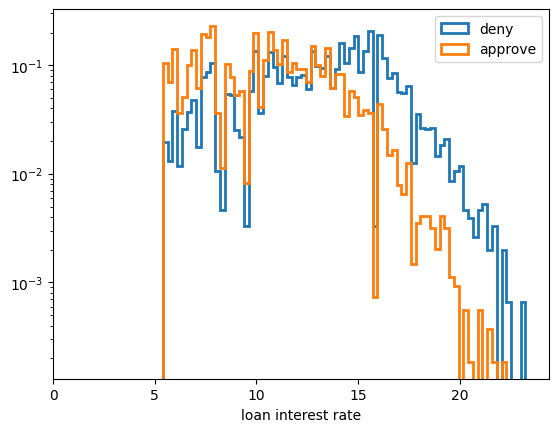

In [273]:
column = 'loan_int_rate'

h_data_deny = data_loan_status_deny[column]
h_data_approve = data_loan_status_approve[column]

max_ = max(h_data_accept.max(), h_data_deny.max())

plt.hist(
    h_data_deny,
    bins=numpy.linspace(0, max_, 100), #logspace(data_train_loan_status_deny[column]),
    histtype='step',
    density=True,
    label='deny',
    linewidth=2,
)
plt.hist(
    h_data_approve,
    bins=numpy.linspace(0, max_, 100), #logspace(data_train_loan_status_accept[column]),
    histtype='step',
    density=True,
    label='approve',
    linewidth=2,
)
plt.xlabel('loan interest rate')
plt.xlim(left=0)
plt.yscale('log')
plt.legend()
None

In [279]:
numpy.count_nonzero(numpy.isnan(data['loan_int_rate'].to_numpy()))

3116

In [282]:
data[(data['loan_int_rate'].isna()) & (data['loan_status'] == 0)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
90,22,240000,OWN,6.0,PERSONAL,B,25000,NaN,0,0.10,N,2
114,24,225000,RENT,0.0,MEDICAL,B,6000,NaN,0,0.03,N,4
174,23,200000,MORTGAGE,7.0,EDUCATION,A,28000,NaN,0,0.14,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32546,60,1900000,MORTGAGE,5.0,PERSONAL,A,1500,NaN,0,0.00,N,21
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


In [283]:
data[(data['loan_int_rate'].isna()) & (data['loan_status'] == 1)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
70,25,12000,OWN,0.0,MEDICAL,C,3000,NaN,1,0.25,N,3
71,22,56950,RENT,6.0,MEDICAL,A,28000,NaN,1,0.49,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32309,66,60000,RENT,4.0,MEDICAL,C,27050,NaN,1,0.45,Y,28
32337,52,15000,RENT,3.0,PERSONAL,B,1200,NaN,1,0.08,N,20
32487,55,78000,MORTGAGE,2.0,DEBTCONSOLIDATION,D,8000,NaN,1,0.10,N,29
32535,65,133000,MORTGAGE,2.0,DEBTCONSOLIDATION,E,18000,NaN,1,0.14,N,25


In [281]:
data[data['loan_int_rate'].isna()].to_csv('data-loan_int_rate-isna.csv')

In [284]:
data_no_nan = data[data['loan_int_rate'].isna() == False]
len(data_no_nan), len(data)

(29465, 32581)

In [286]:
x = data_no_nan['loan_int_rate'].to_numpy().reshape(-1, 1)
y = data_no_nan['loan_status'].to_numpy()
model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x, y)
clf.score(x, y)

0.7941965043271678

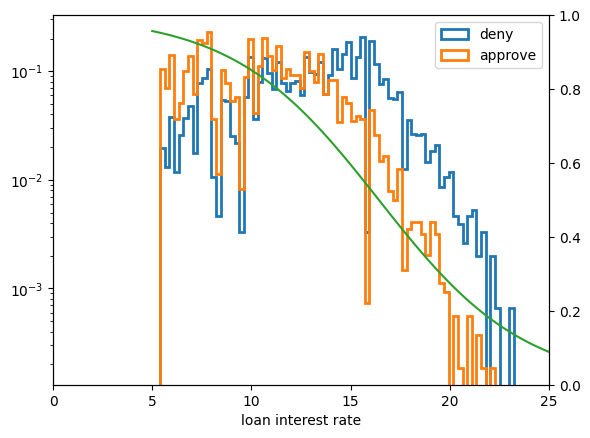

In [293]:
column = 'loan_int_rate'

h_data_deny = data_loan_status_deny[column]
h_data_approve = data_loan_status_approve[column]

max_ = max(h_data_accept.max(), h_data_deny.max())

plt.hist(
    h_data_deny,
    bins=numpy.linspace(0, max_, 100), #logspace(data_train_loan_status_deny[column]),
    histtype='step',
    density=True,
    label='deny',
    linewidth=2,
)
plt.hist(
    h_data_approve,
    bins=numpy.linspace(0, max_, 100), #logspace(data_train_loan_status_accept[column]),
    histtype='step',
    density=True,
    label='approve',
    linewidth=2,
)
plt.legend()
plt.xlabel('loan interest rate')
plt.yscale('log')
_ = plt.twinx()
_ = plt.plot(
    numpy.linspace(5,25,100),
    1-clf.predict_proba(numpy.linspace(5,25,100).reshape(-1,1))[:,1],
    color='tab:green',
    label='logistic',
)
plt.xlim(xmin=0, xmax=25)
plt.ylim(ymin=0, ymax=1)
None

In [295]:
x1 = data_test['loan_int_rate'].to_numpy().reshape(-1, 1)
y1 = clf.predict_proba(x1)

x1.shape, y1.shape

((39098, 1), (39098, 2))

In [301]:
data_test_predict = pandas.DataFrame(
    {
        'id': data_test['id'],
        'loan_status': y1[:,1],
    }
)
data_test_predict

,id,loan_status
0,58645,0.455159
1,58646,0.265795
2,58647,0.551912
3,58648,0.114829
4,58649,0.493049
...,...,...
39093,97738,0.162026
39094,97739,0.056171
39095,97740,0.081682
39096,97741,0.445750


In [302]:
data_test_predict.to_csv(
    'data_test_predict_original_1-logistic-loan_interest_rate.csv',
    index=False,
)

# Combine Loan Interest Rate and Loan Percent Income

In [ ]:
data_no_nan_loan_status_approve = data_no_nan[data_no_nan['loan_status'] == 0]
data_no_nan_loan_status_deny = data_no_nan[data_no_nan['loan_status'] == 1]

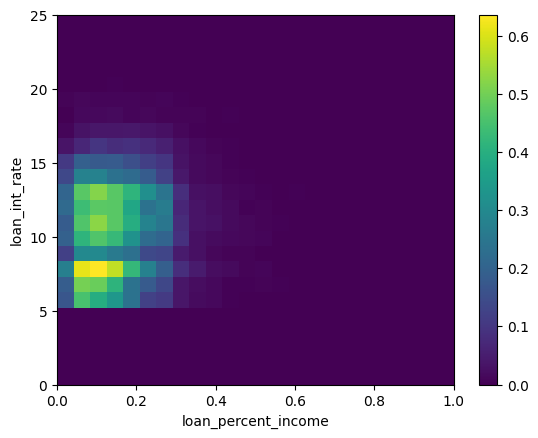

In [337]:
bins_x = numpy.linspace(0, 1, 25)
bins_y = numpy.linspace(0, 25, 25)

h_approve, h_x_edge, h_y_edge, _ = plt.hist2d(
    data_no_nan_loan_status_approve['loan_percent_income'],
    data_no_nan_loan_status_approve['loan_int_rate'],
    bins=[bins_x, bins_y],
    label='approve',
    density=True,
)
plt.xlim(xmin=0, xmax=1)
plt.ylim(ymin=0, ymax=25)
plt.xlabel('loan_percent_income')
plt.ylabel('loan_int_rate')
plt.colorbar()
None

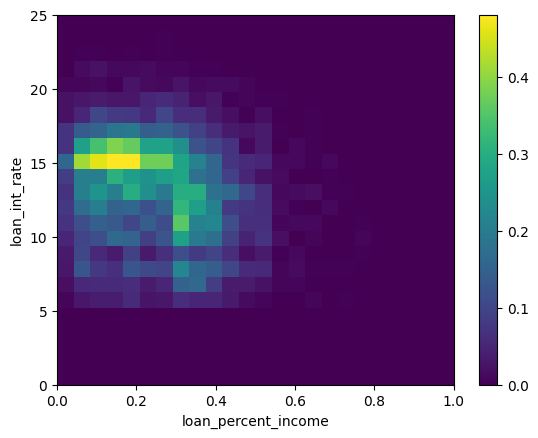

In [335]:
bins_x = numpy.linspace(0, 1, 25)
bins_y = numpy.linspace(0, 25, 25)

h_deny, _,_,_ = plt.hist2d(
    data_no_nan_loan_status_deny['loan_percent_income'],
    data_no_nan_loan_status_deny['loan_int_rate'],
    bins=[bins_x, bins_y],
    label='deny',
    density=True,
)
plt.xlim(xmin=0, xmax=1)
plt.ylim(ymin=0, ymax=25)
plt.xlabel('loan_percent_income')
plt.ylabel('loan_int_rate')
plt.colorbar()
None

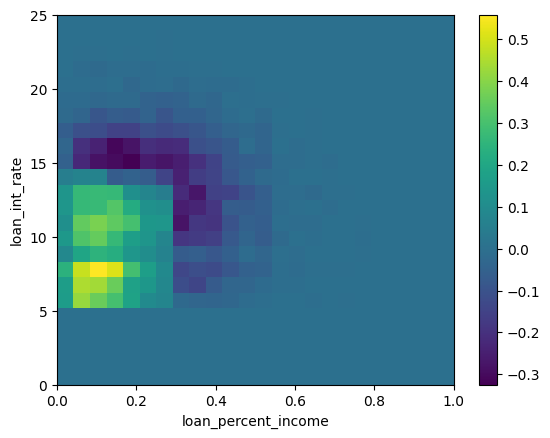

In [416]:
h_diff = h_approve - h_deny

plt.imshow(
    h_diff.T,
    origin='lower',
    aspect='auto',
    extent=[h_x_edge[0], h_x_edge[-1], h_y_edge[0], h_y_edge[-1]],
)
plt.xlabel('loan_percent_income')
plt.ylabel('loan_int_rate')
plt.xlim(xmin=0, xmax=1)
plt.ylim(ymin=0, ymax=25)
plt.colorbar()
None

In [401]:
h_diff.shape

(24, 24)

In [424]:
x = numpy.concat(
    [
        data_no_nan['loan_percent_income'].to_numpy().reshape(-1, 1),
        data_no_nan['loan_int_rate'].to_numpy().reshape(-1, 1),
    ],
    axis=1,
)

y = data_no_nan['loan_status'].to_numpy()

model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x, y)
clf.score(x, y)

0.8207704055659256

In [362]:
#bins_x = numpy.linspace(0, 1, 25)
#bins_y = numpy.linspace(0, 25, 25)
#bins_xy = numpy.concatenate([bins_x, bins_y], axis=1)

xv, yv = numpy.meshgrid(
    numpy.linspace(0, 1, 25),
    numpy.linspace(0, 25, 25),
)

In [383]:
numpy.meshgrid(numpy.linspace(0,4,5), numpy.linspace(0,1,3))

(array([[0., 1., 2., 3., 4.],
        [0., 1., 2., 3., 4.],
        [0., 1., 2., 3., 4.]]),
 array([[0. , 0. , 0. , 0. , 0. ],
        [0.5, 0.5, 0.5, 0.5, 0.5],
        [1. , 1. , 1. , 1. , 1. ]]))

In [385]:
numpy.meshgrid(numpy.linspace(0,4,5), numpy.linspace(0,1,3))[0].ravel().reshape(-1,1)

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [0.],
       [1.],
       [2.],
       [3.],
       [4.]])

In [372]:
bins_xy = numpy.concatenate(
    [xv.ravel().reshape(-1,1), yv.ravel().reshape(-1,1)],
    axis=1,
)
bins_xy.shape

(625, 2)

In [400]:
model_predict = clf.predict_proba(
    bins_xy
)[:,1].reshape(xv.shape)
model_predict.shape

(25, 25)

In [386]:
xv.shape

(25, 25)

In [387]:
yv.shape

(25, 25)

In [391]:
type(model_predict)

numpy.ndarray

In [390]:
type(xv)

numpy.ndarray

In [389]:
type(yv)

numpy.ndarray

In [405]:
model_predict

array([[0.00200267, 0.00283688, 0.00401717, 0.00568573, 0.00804174,
        0.01136286, 0.01603338, 0.0225798 , 0.03171298, 0.04437268,
        0.06176372, 0.085362  , 0.11685362, 0.1579567 , 0.21007853,
        0.27380672, 0.34834195, 0.4311215 , 0.51793766, 0.6036842 ,
        0.68349888, 0.75379513, 0.81275549, 0.86021459, 0.89716664],
       [0.00268598, 0.00380374, 0.00538413, 0.00761612, 0.01076337,
        0.01519127, 0.02140134, 0.03007251, 0.04210582, 0.05866295,
        0.08117902, 0.11131527, 0.15080288, 0.20112798, 0.26304514,
        0.33600634, 0.41773359, 0.50424345, 0.59049997, 0.6715251 ,
        0.7434827 , 0.8042714 , 0.85349325, 0.891999  , 0.92131743],
       [0.00360161, 0.00509844, 0.00721286, 0.01019519, 0.01439274,
        0.02028311, 0.02851441, 0.03994993, 0.05570861, 0.07718371,
        0.10600789, 0.14391769, 0.19246585, 0.25255943, 0.32389044,
        0.40446585, 0.49054287, 0.57718433, 0.65932412, 0.73289138,
        0.79549962, 0.8465064 , 0.8866045 , 0.

In [409]:
bins_xy.shape

(625, 2)

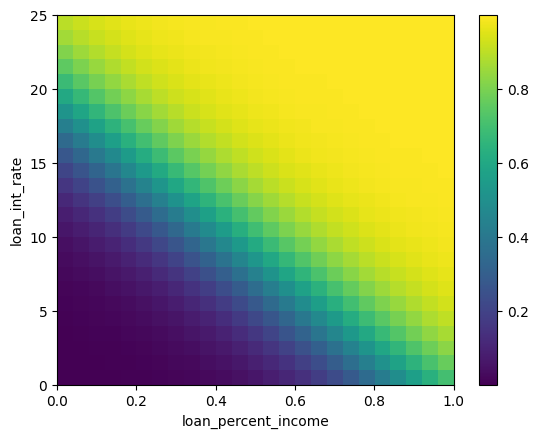

In [414]:
plt.imshow(
    model_predict.T,
    origin='lower',
    aspect='auto',
    extent=[0, 1, 0, 25],
    label='logistic',
)
plt.xlabel('loan_percent_income')
plt.ylabel('loan_int_rate')
plt.colorbar()
None

In [417]:
data_test_no_nan = data_test[data_test['loan_int_rate'].isna() == False]

In [420]:
x1 = numpy.concat(
    [
        data_test_no_nan['loan_percent_income'].to_numpy().reshape(-1, 1),
        data_test_no_nan['loan_int_rate'].to_numpy().reshape(-1, 1),
    ],
    axis=1,
)

y1 = model.predict_proba(x1)

In [421]:
data_test_predict_loan_int_rate_percent_income = pandas.DataFrame(
    {
        'id': data_test_no_nan['id'],
        'loan_status': y1[:,1],
    }
)
data_test_predict_loan_int_rate_percent_income

,id,loan_status
0,58645,0.778423
1,58646,0.142868
2,58647,0.433802
3,58648,0.074169
4,58649,0.414700
...,...,...
39093,97738,0.079864
39094,97739,0.037280
39095,97740,0.119678
39096,97741,0.812795


In [423]:
data_test_predict_loan_int_rate_percent_income.to_csv(
    'data_test_predict_original_1-logistic-loan_int_rate_percent_income.csv',
    index=False,
)

In [427]:
y_prob = clf.predict_proba(x)

y_prob

log_loss(
    y,
    y_prob,
)

0.4059149325499157